### Importación de datos



In [83]:
import pandas as pd
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [109]:
tiendas = [tienda1, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
Ingresos_Totales = list([tienda['Precio'].sum() for tienda in tiendas])
Ingresos_Totales

[np.float64(1150880400.0),
 np.float64(1116343500.0),
 np.float64(1098019600.0),
 np.float64(1038375700.0)]

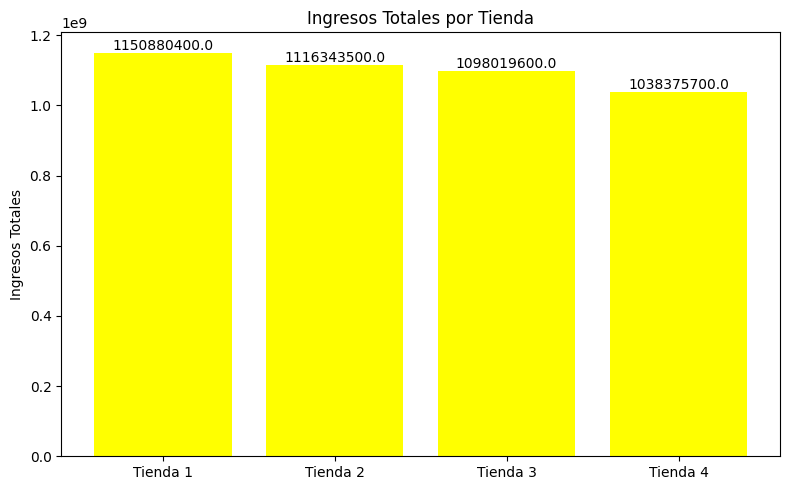

In [107]:
# Gráfico de barras

plt.figure(figsize=(8, 5))
barras = plt.bar(nombres_tiendas, Ingresos_Totales, color='yellow')
plt.ylabel('Ingresos Totales')
plt.title('Ingresos Totales por Tienda')

for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval + 0.05, round(yval, 2),
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [97]:
conteo_categorias = [tienda['Categoría del Producto'].value_counts() for tienda in tiendas]
populares_categoria = [categoria.idxmax() for categoria in conteo_categorias]
populares_cant = [categoria.max() for categoria in conteo_categorias]
print(populares_categoria)
print(populares_cant)

['Muebles', 'Muebles', 'Muebles', 'Muebles']
[465, 442, 499, 480]


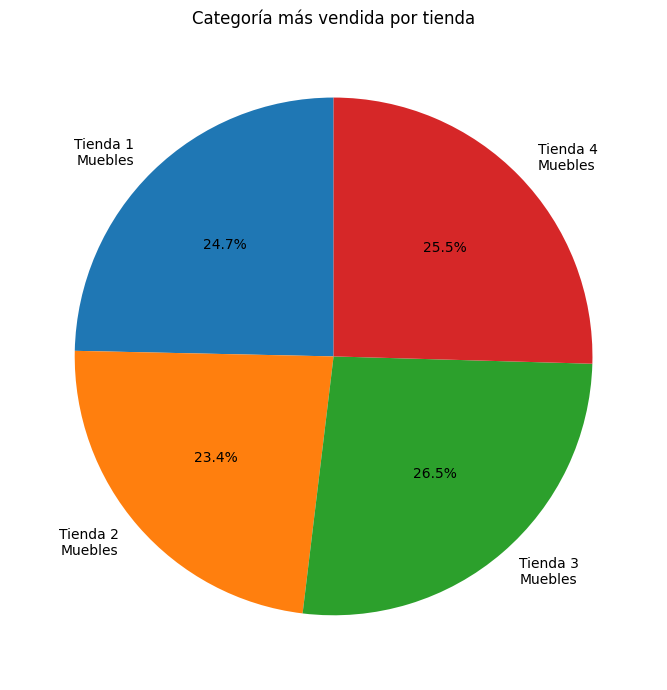

In [99]:
# Etiquetas para colocar nombre de la tienda y categoría correspondiente
etiquetas = [f'{tienda}\n{categoria}' for tienda, categoria in zip(nombres_tiendas, populares_categoria)]

plt.figure(figsize=(7, 7))
plt.pie(populares_cant, labels=etiquetas, autopct='%1.1f%%', startangle=90)
plt.title('Categoría más vendida por tienda')
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [101]:
promedios = [round(tienda['Calificación'].sum()/len(tienda['Calificación']), 2) for tienda in tiendas]
print(promedios)

[np.float64(3.98), np.float64(4.04), np.float64(4.05), np.float64(4.0)]


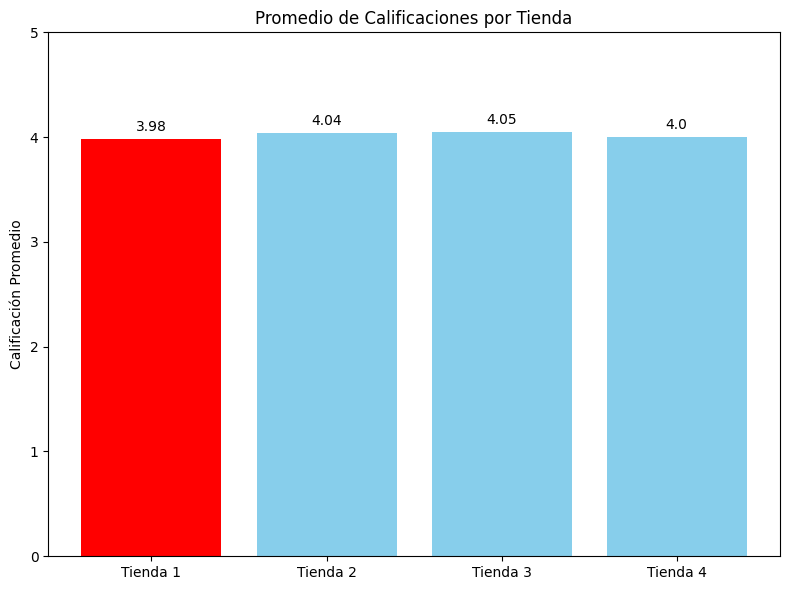

In [102]:
# Gráfico de barras
calif_min = promedios.index(min(promedios))
colores = ['skyblue' if i != calif_min else 'red' for i in range(len(promedios))]

plt.figure(figsize=(8, 6))
barras = plt.bar(nombres_tiendas, promedios, color=colores)

plt.title('Promedio de Calificaciones por Tienda')
plt.ylabel('Calificación Promedio')
plt.ylim(0, 5)

for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval + 0.05, round(yval, 2),
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [82]:
conteo_productos = [tienda['Producto'].value_counts() for tienda in tiendas]

mas_vendidos = [(tienda.idxmax(), tienda.max()) for tienda in conteo_productos]
menos_vendidos = [(tienda.idxmin(), tienda.min()) for tienda in conteo_productos]

print(mas_vendidos)
print(menos_vendidos)

[('Microondas', 60), ('Iniciando en programación', 65), ('Kit de bancas', 57), ('Cama box', 62)]
[('Auriculares con micrófono', 33), ('Juego de mesa', 32), ('Bloques de construcción', 35), ('Guitarra eléctrica', 33)]


# 5. Envío promedio por tienda

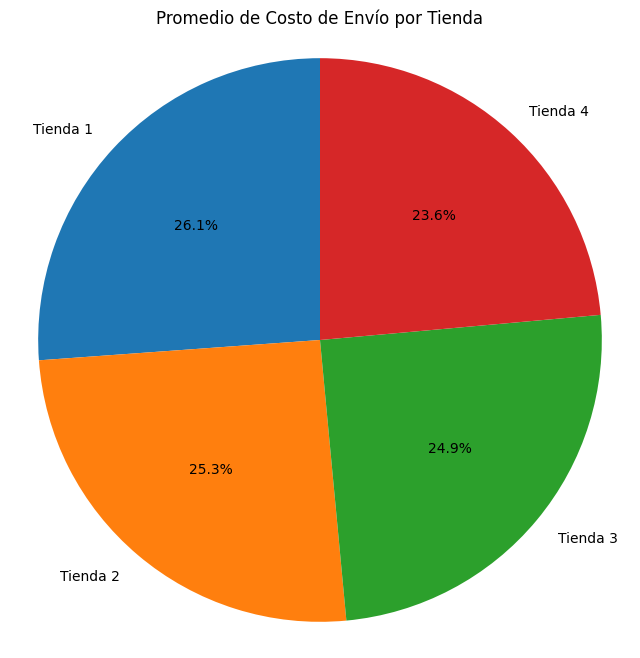

In [108]:
promedio_envios = [round(tienda['Costo de envío'].sum()/len(tienda['Costo de envío']), 2) for tienda in tiendas]

# Gráfica de pastel para comparar los gastos de envío
plt.figure(figsize=(8, 8))
plt.pie(promedio_envios, labels=nombres_tiendas, autopct='%1.1f%%', startangle=90)

plt.title('Promedio de Costo de Envío por Tienda')
plt.axis('equal')
plt.show()

In [110]:
promedio_envios

[np.float64(26018.61),
 np.float64(25216.24),
 np.float64(24805.68),
 np.float64(23459.46)]

# 6. Informe final

## Introducción

El presente informe tiene como objetivo analizar el desempeño de cuatro tiendas de la cadena Alura Store, perteneciente al Sr. Juan, con el fin de determinar cuál de ellas conviene vender para iniciar un nuevo emprendimiento. Para ello, se evaluaron diversos factores clave: ingresos totales, productos más y menos vendidos, categorías más populares, calificaciones de los clientes y costos de envío. Este análisis se complementó con visualizaciones gráficas que facilitaron la comparación entre las tiendas.

---

## Análisis de Resultados

### 1. Ingresos Totales

Los ingresos brutos por tienda fueron los siguientes:

- **Tienda 1**: \$1,150,880,400
- **Tienda 2**: \$1,116,343,500
- **Tienda 3**: \$1,098,019,600
- **Tienda 4**: \$1,038,375,700

### 2. Calificación Promedio de Clientes

Las calificaciones revelan la satisfacción del cliente:

- **Tienda 1**: 3.98 (la más baja)
- **Tienda 2**: 4.04
- **Tienda 3**: 4.05 (la más alta)
- **Tienda 4**: 4.00

Esto indica que **Tienda 1 tiene oportunidades de mejora en calidad o servicio al cliente**.

### 3. Categoría Más Popular

En todas las tiendas, la categoría **Muebles** fue la más vendida:

- Tienda 1: 465
- Tienda 2: 442
- Tienda 3: 499 🥇
- Tienda 4: 480

La **demanda por muebles** es una constante entre tiendas, es importante destacar que las tiendas 3 y 4 son las que más artículos han vendido en esta categoría.

### 4. Productos Más y Menos Vendidos

- Más vendidos: “Microondas”, “Iniciando en programación”, “Kit de bancas”, “Cama box”
- Menos vendidos: “Auriculares con micrófono”, “Juego de mesa”, “Bloques de construcción”, “Guitarra eléctrica”

Estos resultados ayudan a ajustar el catálogo de productos para tener correcta disponibilidad de los productos más demandados y verificar los productos que deben seguir en venta para evitar pérdidas.

En el análisis de estos datos se puede notar que las tiendas 1 y 3 son las que menos cantidad de productos populares venden.

### 5. Costos de Envío Promedio

- **Tienda 1**: \$26,018.61
- **Tienda 2**: \$25,216.24
- **Tienda 3**: \$24,805.68
- **Tienda 4**: \$23,459.46

El alto costo en Tienda 1 afecta directamente su competitividad logística.

---

## Conclusión

Después de analizar todos los indicadores clave, se recomienda que el Sr. Juan **venda la Tienda 1**. Aunque es la tienda con **mayores ingresos**, no necesariamente es la que representa mayores ganancias, ya que presenta **varias debilidades importantes**:

- **La calificación más baja**, lo que puede reflejar problemas de calidad, logística o servicio al cliente.
- **El costo de envío más alto**, lo cual podría limitar su competitividad futura y rentabilidad.
- Podría enfrentar **problemas de reputación a largo plazo** si no se corrigen los aspectos que le han hecho obtener la calificación más baja.

Vender la Tienda 1 permitiría capitalizar sus ingresos actuales, evitando un posible deterioro de su desempeño, y reinvertir en otra tienda con **mejor calificación, menores costos y potencial de crecimiento**, como la Tienda 3 o un nuevo emprendimiento.

Al ser un buen momento en cuanto a ingresos para la Tienda 1, se puede llegar a un acuerdo favorable para venderla.

Esta decisión se respalda tanto en los datos numéricos como en las visualizaciones gráficas que permiten ver claramente las fortalezas y debilidades de cada tienda.

---
